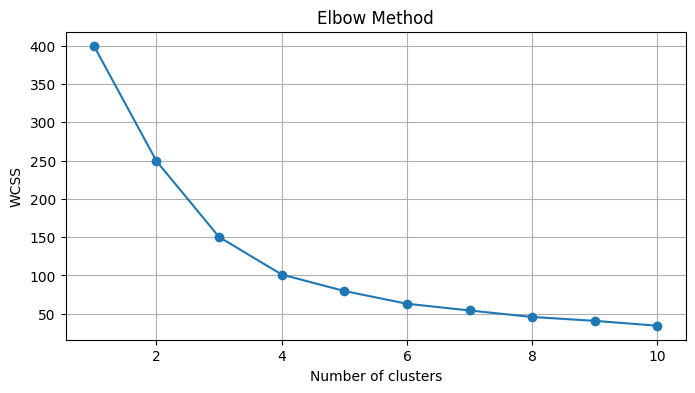

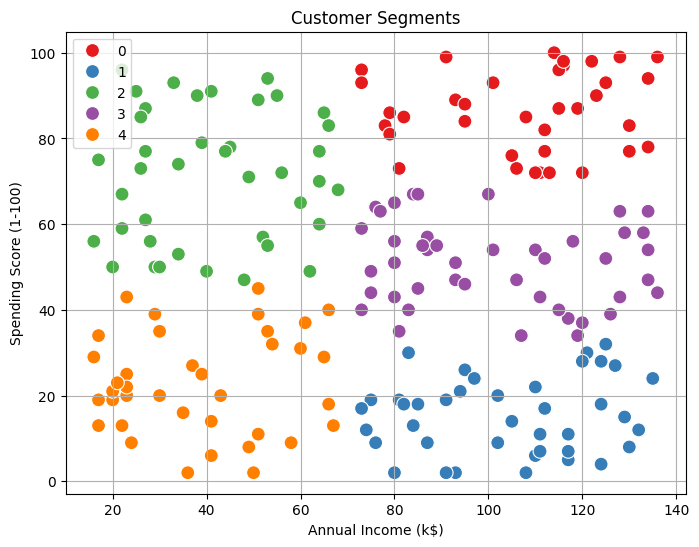

In [2]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Step 2: Load or create sample data
# You can replace this with actual e-commerce data
data = {
    'CustomerID': range(1, 201),
    'Annual Income (k$)': np.random.randint(15, 137, size=200),
    'Spending Score (1-100)': np.random.randint(1, 101, size=200)
}
df = pd.DataFrame(data)

# Step 3: Select features for clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Step 4: Feature scaling (important for clustering)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 5: Find optimal number of clusters using Elbow Method
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot WCSS to find the elbow
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

# Step 6: Fit KMeans with optimal k (e.g., 5)
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Step 7: Visualize the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='Annual Income (k$)', y='Spending Score (1-100)',
    hue='Cluster', palette='Set1', data=df, s=100
)
plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.show()
